In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd 
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('swiggy_biryani.csv')

In [3]:
df1=pd.read_csv('swiggy_northindian.csv')

In [4]:
df2=pd.read_csv('swiggy_toprated.csv')

In [5]:
data = pd.concat([df,df1,df2])

In [6]:
data.reset_index(inplace = True)

In [7]:
data.to_csv('swiggy_whole_data.csv')

In [8]:
data = pd.read_csv('swiggy_whole_data.csv')

# Data Cleaning¶
# 1. Restaurants that serve 'Biryani', 'North Indian', 'Top Rated' .

In [9]:
# starts with cleaning the unncessary data like colums and rows with symbols or changes that need to  done.
# replace function.
# drop function.
#value_count.
#astype ('float') use for object to change into a(numbers) float values part of cleaning.
#

In [10]:
data['rating'] = data['Time'].apply(lambda x:x.split('•')[0])

In [11]:
data['price'] = data['Time'].apply(lambda x:x.split('•')[2])

In [12]:
data['time'] = data['Time'].apply(lambda x:x.split('•')[1])

In [13]:
data['Italian_available']= data['Type'].apply(lambda x:'yes' if 'Italian' in x else 'no')

In [14]:
data['Beverages_available']= data['Type'].apply(lambda x:'yes' if 'Beverages' in x else 'no')

In [15]:
data['Desserts_available']=data['Type'].apply(lambda x: 'yes' if 'Desserts' in x else 'no')

In [16]:
data['Continental_available']= data['Type'].apply(lambda x: 'yes' if 'Continental' in x else 'no')

In [17]:
data['Tandoor_available']=data['Type'].apply(lambda x: 'yes' if 'Tandoor' in x else 'no')

In [18]:
data['Chinese_available']= data['Type'].apply(lambda x: 'yes' if 'Chinese' in x else 'no')

In [19]:
data['time'] = data['time'].apply(lambda x:x.split()[0])

In [20]:
data['price'] = data['price'].apply(lambda x:x.split()[0])

In [21]:
data.drop('Unnamed: 0.1',axis=1,inplace = True)

In [22]:
data['Continental_available'].value_counts()

Series([], Name: count, dtype: int64)

In [23]:
data.rename(columns={'price':'price for Two'},inplace= True)

In [24]:
data['price for Two'] = data['price for Two'].apply(lambda x:x.replace('₹',''))

In [25]:
data['price for Two'] = data['price for Two'].astype('float')

In [26]:
data['rating'] = data['rating'].apply(lambda x: 0 if '--' in x else x).astype('float')

In [27]:
data['time'] = data['time'].astype('float')

In [28]:
data.drop('Chinese_available',axis= 1,inplace= True)

In [29]:
data['biryani_available'] = data['Type'].apply(lambda x: 'yes'if 'Biryani' in x else 'no' )

# EDA
# Explorataroy Data Analysis

In [30]:
data.columns

Index(['index', 'Unnamed: 0', 'Restaurant', 'Type', 'Time', 'rating',
       'price for Two', 'time', 'Italian_available', 'Beverages_available',
       'Desserts_available', 'Continental_available', 'Tandoor_available',
       'biryani_available'],
      dtype='object')

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  0 non-null      object 
 1   Unnamed: 0             0 non-null      object 
 2   Restaurant             0 non-null      object 
 3   Type                   0 non-null      object 
 4   Time                   0 non-null      object 
 5   rating                 0 non-null      float64
 6   price for Two          0 non-null      float64
 7   time                   0 non-null      float64
 8   Italian_available      0 non-null      object 
 9   Beverages_available    0 non-null      object 
 10  Desserts_available     0 non-null      object 
 11  Continental_available  0 non-null      object 
 12  Tandoor_available      0 non-null      object 
 13  biryani_available      0 non-null      object 
dtypes: float64(3), object(11)
memory usage: 132.0+ bytes


# Restuarants

In [32]:
data['Restaurant'].describe()

count       0
unique      0
top       NaN
freq      NaN
Name: Restaurant, dtype: object

In [33]:
data['Restaurant'].value_counts()

Series([], Name: count, dtype: int64)

# PRICE

In [34]:
data['price for Two'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: price for Two, dtype: float64

In [35]:
data['rating'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: rating, dtype: float64

# FINDING MISSING VALUES

In [36]:
data.isnull()

,index,Unnamed: 0,Restaurant,Type,Time,rating,price for Two,time,Italian_available,Beverages_available,Desserts_available,Continental_available,Tandoor_available,biryani_available


In [37]:
data.drop_duplicates()

,index,Unnamed: 0,Restaurant,Type,Time,rating,price for Two,time,Italian_available,Beverages_available,Desserts_available,Continental_available,Tandoor_available,biryani_available


# Analyzing the Data

In [38]:
data.rename(columns = {'Type':'cuisine'},inplace = True) #TYPE CHANGED TO CUISINE

In [39]:
data.aggregate({'min','max'})# 

,index,Unnamed: 0,Restaurant,cuisine,Time,rating,price for Two,time,Italian_available,Beverages_available,Desserts_available,Continental_available,Tandoor_available,biryani_available
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
data

,index,Unnamed: 0,Restaurant,cuisine,Time,rating,price for Two,time,Italian_available,Beverages_available,Desserts_available,Continental_available,Tandoor_available,biryani_available


# Statistical analysis

In [41]:
data.describe()

,rating,price for Two,time
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


In [42]:
data['price for Two'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: price for Two, dtype: float64

In [43]:
data['time'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: time, dtype: float64

In [44]:
data['Italian_available'].describe()

count       0
unique      0
top       NaN
freq      NaN
Name: Italian_available, dtype: object

In [45]:
data['Beverages_available'].describe()

count       0
unique      0
top       NaN
freq      NaN
Name: Beverages_available, dtype: object

In [46]:
data['Desserts_available'].describe()

count       0
unique      0
top       NaN
freq      NaN
Name: Desserts_available, dtype: object

In [47]:
data['Continental_available'].describe()

count       0
unique      0
top       NaN
freq      NaN
Name: Continental_available, dtype: object

In [48]:
data['Tandoor_available'].describe()

count       0
unique      0
top       NaN
freq      NaN
Name: Tandoor_available, dtype: object

In [49]:
data['biryani_available'].describe()

count       0
unique      0
top       NaN
freq      NaN
Name: biryani_available, dtype: object

In [50]:
data['Restaurant'].describe()

count       0
unique      0
top       NaN
freq      NaN
Name: Restaurant, dtype: object

In [51]:
data['cuisine'].describe()

count       0
unique      0
top       NaN
freq      NaN
Name: cuisine, dtype: object

# Visualization

# ***Rating***


In [52]:
data['rating'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: rating, dtype: float64

<Figure size 600x600 with 0 Axes>

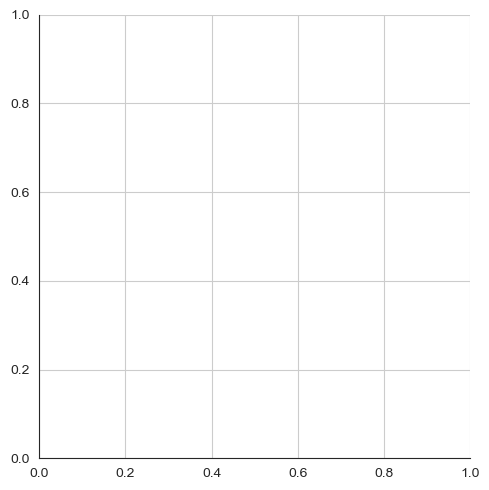

In [53]:
plt.figure(figsize = (6,6))# doubt
sns.set_style('white')
sns.displot(x='rating',data = data,color = 'g')
plt.grid(True)
plt.show()

# Observation: from the above plot we can see 4.6 marks the highest .

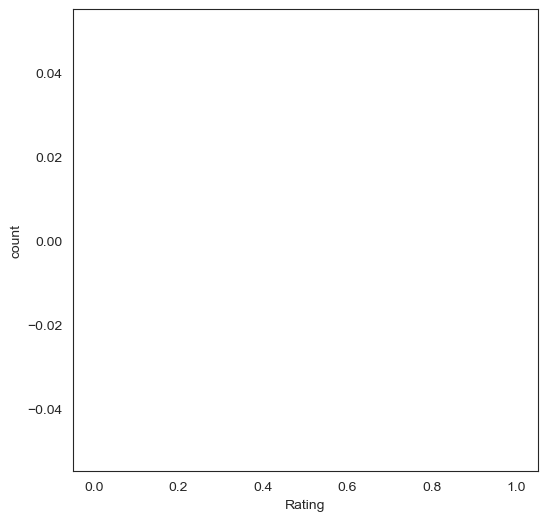

In [54]:
plt.figure(figsize=(6,6))
sns.set_style('white')
plt.hist(data['rating'][:10],bins = 10,color = 'orange')
plt.xlabel('Rating')
plt.ylabel('count')
plt.show()

# observation: From above plot 3.9 - 4.2 ratings are high.

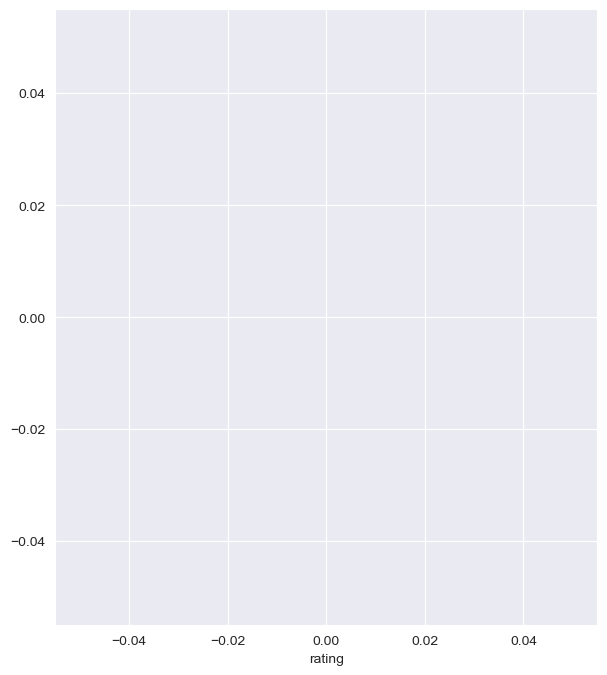

In [55]:
plt.figure(figsize=(7,8))
sns.set_style('dark')
sns.distplot(data['rating'])
plt.grid(True)
plt.show()

# TIME

<Figure size 900x700 with 0 Axes>

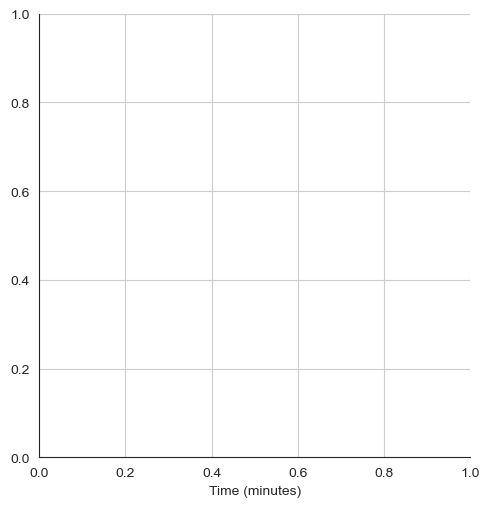

In [56]:
plt.figure(figsize=(9,7))
sns.set_style('white')
sns.displot(x = 'time',data = data,color = 'grey')
plt.xlabel('Time (minutes)')
plt.grid(True)
plt.show()

# Bivariate

In [57]:
data.groupby('Italian_available').sum()

,index,Unnamed: 0,Restaurant,cuisine,Time,rating,price for Two,time,Beverages_available,Desserts_available,Continental_available,Tandoor_available,biryani_available
Italian_available,,,,,,,,,,,,,


In [58]:
data.groupby('Tandoor_available').mean()

,index,Unnamed: 0,Restaurant,cuisine,Time,rating,price for Two,time,Italian_available,Beverages_available,Desserts_available,Continental_available,biryani_available
Tandoor_available,,,,,,,,,,,,,


In [59]:

data.groupby('Desserts_available').mean()

,index,Unnamed: 0,Restaurant,cuisine,Time,rating,price for Two,time,Italian_available,Beverages_available,Continental_available,Tandoor_available,biryani_available
Desserts_available,,,,,,,,,,,,,


In [60]:
table = pd.pivot_table(data,index=['biryani_available','time'],values='rating',aggfunc = {np.mean})
table

,
biryani_available,time


# Top 10 Restaurants based on Highest Ratings.

IndexError: index 0 is out of bounds for axis 0 with size 0

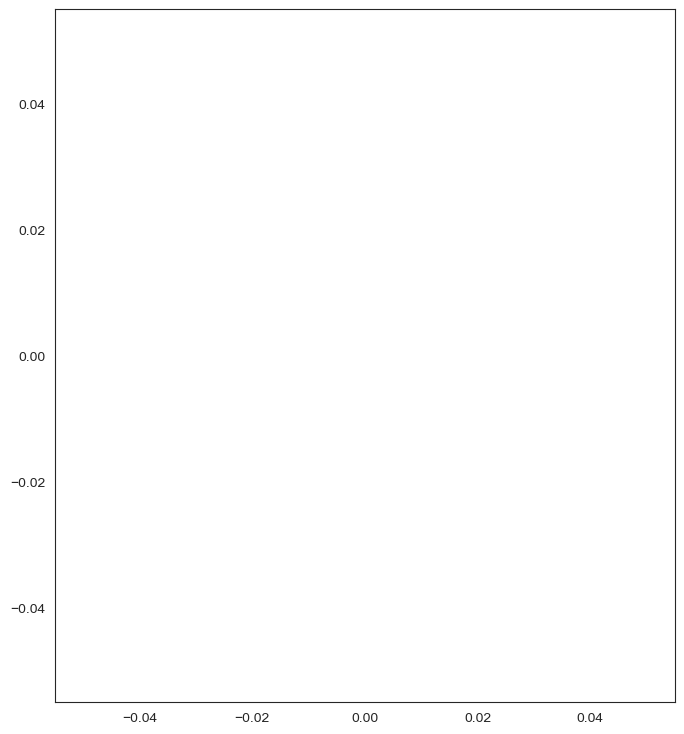

In [65]:
plt.figure(figsize= (8,9))
sns.color_palette('gray')
sns.set_style('white')
pd.Series(data['Restaurant'].value_counts(ascending = False)[:20].plot(kind = 'barh',color = 'pink'))
plt.title('Most appeared Restaraunt',color = 'k')
plt.xlabel('Apperances',color = 'k')
plt.ylabel('Restaraunt',color = 'k')
plt.show()